# Installation

In [1]:
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for model building

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

# for model evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
df = pd.read_csv("/Users/jessicazhang/Desktop/data.csv")

In [37]:
df = df.sample(frac=1, random_state=2021)

In [38]:
df.shape

(5267, 11)

# Adding Columns

## 1. for x5^0.5

In [150]:
# x5 is the number of bathroom
# Bathroom_sqrt is the result of square of root

df['Bathroom_sqrt'] = np.sqrt(df['Bathroom'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Bathroom_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,1.414214
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,1.000000
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,1.000000
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,1.732051
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,1.000000


## 2. for x5^2

In [32]:
# Bathroom_sqr means Bathroom*Bathroom
# pow() means the square
# i.e. pow(4,2) = 4^2 = 16

df['Bathroom_sqr'] = pow(df['Bathroom'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Bathroom_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,4
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,1
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,1
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,9
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,1


## 3. for x8^0.5

In [22]:
# x8 is the building area
# BuildingArea_sqr is the square root.

df['BuildingArea_sqrt'] = np.sqrt(df['BuildingArea'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqrt
3246,1,0,0,3,1,2,242,124.0,10.4,2010,730000,11.135529
2831,1,0,0,3,2,2,243,133.0,13.0,2014,680000,11.532563
1052,0,1,0,3,2,2,194,200.0,13.9,2008,700000,14.142136
5198,0,0,1,2,1,1,215,68.0,14.5,2007,472000,8.246211
2975,1,0,0,3,2,2,305,130.0,17.9,2000,861000,11.401754


## 4. for x8^2

In [25]:
# BuildingArea_sqr is the square result.

df['BuildingArea_sqr'] = pow(df['BuildingArea'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,1044484.0
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,872356.0
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,627264.0
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,622521.0
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,518400.0


## 5. for x9^0.5

In [66]:
# x9 is the distance
# Distance_sqrt is the square root.

df['Distance_sqrt'] = np.sqrt(df['Distance'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Distance_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,2.366432
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,4.037326
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,3.492850
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,4.979960
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,3.033150


## 6. for x9^2

In [45]:
# Distance_sqr is the square.

df['Disctance_sqr'] = pow(df['Distance'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Disctance_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,31.36
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,265.69
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,148.84
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,615.04
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,84.64


## 7. combination

In [39]:
# X8 is the building area
# pow() means the square of the number
# i.e. pow(4,2) = 4*4 = 16

df['BuildingArea_sqr'] = pow(df['BuildingArea'],2)
df['Distance_sqr'] = pow(df['Distance'], 2)
df['Bathroom_sqrt']= np.sqrt(df['Bathroom'])

df.head()


,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
3246,1,0,0,3,1,2,242,124.0,10.4,2010,730000,15376.0,108.16,1.000000
2831,1,0,0,3,2,2,243,133.0,13.0,2014,680000,17689.0,169.00,1.414214
1052,0,1,0,3,2,2,194,200.0,13.9,2008,700000,40000.0,193.21,1.414214
5198,0,0,1,2,1,1,215,68.0,14.5,2007,472000,4624.0,210.25,1.000000
2975,1,0,0,3,2,2,305,130.0,17.9,2000,861000,16900.0,320.41,1.414214


# Drop Column

In [23]:
df = df.drop(['Rooms'], axis=1)

In [40]:
df = df.drop(['Landsize'], axis=1)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
3246,1,0,0,3,1,2,124.0,10.4,2010,730000,15376.0,108.16,1.000000
2831,1,0,0,3,2,2,133.0,13.0,2014,680000,17689.0,169.00,1.414214
1052,0,1,0,3,2,2,200.0,13.9,2008,700000,40000.0,193.21,1.414214
5198,0,0,1,2,1,1,68.0,14.5,2007,472000,4624.0,210.25,1.000000
2975,1,0,0,3,2,2,130.0,17.9,2000,861000,16900.0,320.41,1.414214


# Spliting into Train and Test Data

In [41]:
df["YearBuilt"] = 2021 - df["YearBuilt"]
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
3246,1,0,0,3,1,2,124.0,10.4,11,730000,15376.0,108.16,1.000000
2831,1,0,0,3,2,2,133.0,13.0,7,680000,17689.0,169.00,1.414214
1052,0,1,0,3,2,2,200.0,13.9,13,700000,40000.0,193.21,1.414214
5198,0,0,1,2,1,1,68.0,14.5,14,472000,4624.0,210.25,1.000000
2975,1,0,0,3,2,2,130.0,17.9,21,861000,16900.0,320.41,1.414214


In [42]:
# Drop the last column
X = df.drop(['Price'], axis = 1)

In [43]:
X

,Type1,Type2,Type3,Rooms,Bathroom,Car,BuildingArea,Distance,YearBuilt,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
3246,1,0,0,3,1,2,124.0,10.4,11,15376.0,108.16,1.000000
2831,1,0,0,3,2,2,133.0,13.0,7,17689.0,169.00,1.414214
1052,0,1,0,3,2,2,200.0,13.9,13,40000.0,193.21,1.414214
5198,0,0,1,2,1,1,68.0,14.5,14,4624.0,210.25,1.000000
2975,1,0,0,3,2,2,130.0,17.9,21,16900.0,320.41,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0,0,1,3,2,1,110.0,7.8,27,12100.0,60.84,1.414214
2669,1,0,0,3,1,2,137.0,11.2,46,18769.0,125.44,1.000000
1152,1,0,0,4,2,2,194.0,15.4,11,37636.0,237.16,1.414214
3413,1,0,0,4,2,1,120.0,18.0,18,14400.0,324.00,1.414214


In [44]:
y = df["Price"]
print(y)

3246     730000
2831     680000
1052     700000
5198     472000
2975     861000
         ...   
3934     763000
2669    1390000
1152     945000
3413     628000
1140    1525000
Name: Price, Length: 5267, dtype: int64


## Normalization

In [9]:
from sklearn import preprocessing

In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)  

## Model

In [173]:
# Divide the data into two groups: training set and testing set

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=320, test_size=0.27)

### K Fold

In [11]:
from sklearn.model_selection import KFold

In [46]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1054 1055 1056 ... 5264 5265 5266] TEST: [   0    1    2 ... 1051 1052 1053]
TRAIN: [   0    1    2 ... 5264 5265 5266] TEST: [1054 1055 1056 ... 2105 2106 2107]
TRAIN: [   0    1    2 ... 5264 5265 5266] TEST: [2108 2109 2110 ... 3158 3159 3160]
TRAIN: [   0    1    2 ... 5264 5265 5266] TEST: [3161 3162 3163 ... 4211 4212 4213]
TRAIN: [   0    1    2 ... 4211 4212 4213] TEST: [4214 4215 4216 ... 5264 5265 5266]


In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4214, 12)
(1053, 12)
(4214,)
(1053,)


### Linear Regression

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Score

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# (1) Orginal
orginal_score = cross_val_score(model, X, y, cv=5)
print("Original score:",orginal_score)

Original score: [0.52330568 0.5656773  0.52000582 0.54640202 0.47200789]


In [33]:
# (2) Drop a column ‘Rooms’ and Add a new column: x8^0.5
drop_score = cross_val_score(model, X, y, cv=5)
print("After dropping one column:",drop_score)

After dropping one column: [0.5514069  0.58787212 0.53455358 0.56154552 0.4869308 ]


In [50]:
# (3) Drop a column & Feature Engineer (use the combination) 
combined_score = cross_val_score(model, X, y, cv=5)
print("Combination score:",combined_score)

Combination score: [0.54541132 0.59951113 0.53779354 0.57049032 0.49503245]


## Based on the Third Model

### Coefficients & RMSE

In [51]:
# y_pred_class = model.predict(X_test)
model.predict(X_test)

array([1277952., 1248768., 1337856., ..., 1279104., 1284608., 1266432.])

In [52]:
y_test

4214    450000
4215    650000
4216    639000
4217    657000
4218    740000
         ...  
5262    540000
5263    370000
5264    540000
5265    867000
5266    380500
Name: Price, Length: 1053, dtype: int64

In [53]:
# Root Mean Squared Error

def customer_scorer(model, X, y):
    predict_y = model.predict(X)
    rmse = np.sqrt(np.power(predict_y - y, 2).sum() / len(y))
    # rmse = mean_squared_error(predict_y, y, squared=False)
    return rmse

In [19]:
original_rmse = cross_val_score(model, X, y, cv=5, scoring=customer_scorer)
print("Original RMSE:" + (', {:.4f}' * 5).format(*original_rmse))

Original RMSE:, 439363.8769, 418108.6552, 442942.7409, 418938.8163, 496776.7295


In [35]:
drop_rmse = cross_val_score(model, X, y, cv=5, scoring=customer_scorer)
print("Drop RMSE:" + (', {:.4f}' * 5).format(*drop_rmse))

Drop RMSE:, 426216.8884, 407285.4468, 436178.6955, 411886.2597, 489706.0840


In [54]:
combined_rmse = cross_val_score(model, X, y, cv=5, scoring=customer_scorer)
print("Combination RMSE:" + (', {:.4f}' * 5).format(*combined_rmse))

Combination RMSE:, 429055.6920, 401493.1292, 434657.9301, 407663.2127, 485824.3327


## Model Comparison

#### Score

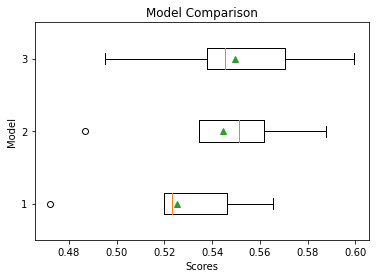

In [56]:
original_score = [0.52330568, 0.5656773,  0.52000582, 0.54640202, 0.47200789]
drop_score = [0.5514069,  0.58787212, 0.53455358, 0.56154552, 0.4869308 ]
combined_score = [0.54541132, 0.59951113, 0.53779354, 0.57049032, 0.49503245]

plt.boxplot([original_score, drop_score, combined_score],vert=False,showmeans=True)
plt.xlabel('Scores')
plt.ylabel('Model')
plt.title('Model Comparison')

plt.show()

### Comment: Model 3 is the best one.

#### RMSE

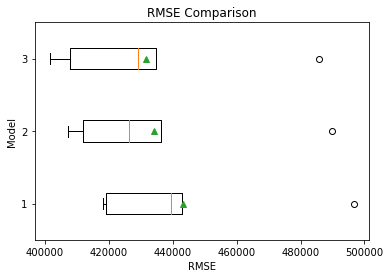

In [57]:
original_rmse = [439363.8769, 418108.6552, 442942.7409, 418938.8163, 496776.7295]
drop_rmse = [426216.8884, 407285.4468, 436178.6955, 411886.2597, 489706.0840]
combined_rmse = [429055.6920, 401493.1292, 434657.9301, 407663.2127, 485824.3327]

plt.boxplot([original_rmse, drop_rmse, combined_rmse],vert=False,showmeans=True)
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE Comparison')

plt.show()

In [59]:
np.mean(combined_rmse)

431738.8593400001